# Heart Disease prediction

# load data 


In [769]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
import warnings 
from IPython.display import display
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')




# read data set

In [770]:
df=pd.read_csv("data.csv")

In [771]:
df.head(10)  # head method show only first 10 rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


# Data Handling and cleanning😁😁


#  Dataset description


Data Content
Age: Age of the patient
Sex: Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp: Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
target: 0= less chance of heart attack 1= more chance of heart attack

In [772]:
df.shape #num of row and column


(1190, 12)

In [773]:
# feature names as a list
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [774]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [775]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [776]:
df.head(5)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# missing value

In [777]:
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


# maype zeros is null!!!sensity cheak

In [778]:
df['max heart rate'].value_counts()

150    49
140    46
120    39
130    36
160    35
       ..
78      1
67      1
63      1
70      1
83      1
Name: max heart rate, Length: 119, dtype: int64

In [779]:
df_copy = df.copy(deep = True)
df[['cholesterol','max heart rate','resting bp s']] = df[['cholesterol','max heart rate','resting bp s']].replace(0,np.NaN)
##count = (df['cholesterol'] > 300).sum()
##print('Count of values greater than 40 in Column B : ', count)
##df[['cholesterol']] = df[['cholesterol']].replace(array[['dataLargerthan300']],np.NaN)


##showing the count of Nans
print(df.isnull().sum())

age                      0
sex                      0
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 0
target                   0
dtype: int64


In [780]:
df_copy['cholesterol'].fillna(df_copy['cholesterol'].median(), inplace=True)
df_copy['resting bp s'].fillna(df_copy['resting bp s'].median(), inplace=True)


print(df_copy.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [781]:
df.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1189.000000,1018.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.264929,245.906680,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,17.971769,57.244599,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,209.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [782]:
df['cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 187., 266., 287., 404.,
       312., 251., 328., 285., 280., 192., 193., 308., 219., 257., 132.,
       226., 217., 303., 298., 256., 117., 295., 173., 315., 281., 309.,
       200., 336., 355., 326., 171., 491., 271., 27

In [783]:
##df['cholesterol'].value_counts()

# Outliers Analysis using BoxBlot

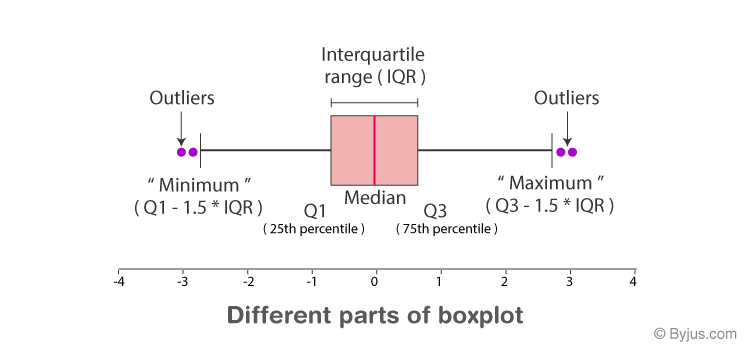

20% out of Q1 Q1:
25% under Q3
25% btween

max without layer
min without layer

In [784]:
df.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1189.000000,1018.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.264929,245.906680,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,17.971769,57.244599,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,209.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


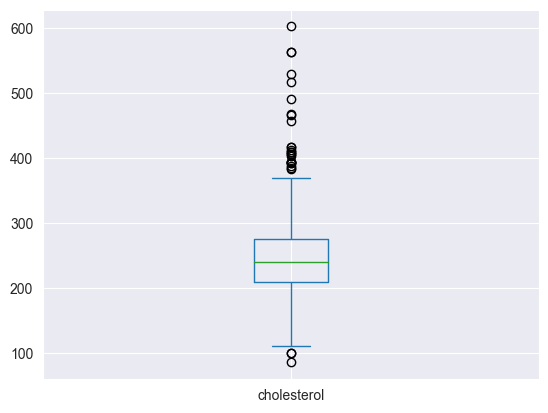

In [785]:
##plt.boxplot(df.age)
##plt.show()
df.cholesterol.plot.box()
plt.show()

In [786]:
df.rename(columns = {'resting bp s':'resting_bp_s', 'max heart rate':'max_heart_rate','ST slope':'ST_slope'},inplace = True)


In [787]:
df[df.cholesterol>370]


,age,sex,chest pain type,resting_bp_s,cholesterol,fasting blood sugar,resting ecg,max_heart_rate,exercise angina,oldpeak,ST_slope,target
28,53,0,2,113.0,468.0,0,0,127,0,0.0,1,0
30,53,1,3,145.0,518.0,0,0,130,0,0.0,2,1
69,44,1,4,150.0,412.0,0,0,170,0,0.0,1,0
76,32,1,4,118.0,529.0,0,0,130,0,0.0,2,1
102,40,0,4,150.0,392.0,0,0,130,0,2.0,2,1
103,40,1,4,120.0,466.0,1,0,152,1,1.0,2,1
123,58,0,2,180.0,393.0,0,0,110,1,1.0,2,1
132,56,1,4,170.0,388.0,0,1,122,1,2.0,2,1
149,54,1,4,130.0,603.0,1,0,125,1,1.0,2,1
183,52,1,4,140.0,404.0,0,0,124,1,2.0,2,1


In [788]:
df=df[df.cholesterol<=370]##drop over370
df=df[df.cholesterol>=104]##drop lestt than100

df.shape

(990, 12)

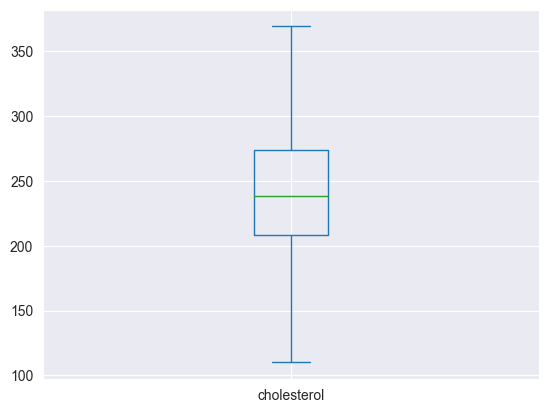

In [789]:
df.cholesterol.plot.box()
plt.show()

In [790]:
df.shape

(990, 12)

In [791]:
df.describe()


,age,sex,chest pain type,resting_bp_s,cholesterol,fasting blood sugar,resting ecg,max_heart_rate,exercise angina,oldpeak,ST_slope,target
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,53.232323,0.741414,3.154545,132.431313,241.394949,0.159596,0.735354,142.835354,0.370707,0.934646,1.581818,0.466667
std,9.426774,0.438079,0.956778,17.469628,46.879819,0.366416,0.896382,24.614647,0.483238,1.093571,0.605730,0.499140
min,28.000000,0.000000,1.000000,92.000000,110.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.250000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,238.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,369.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


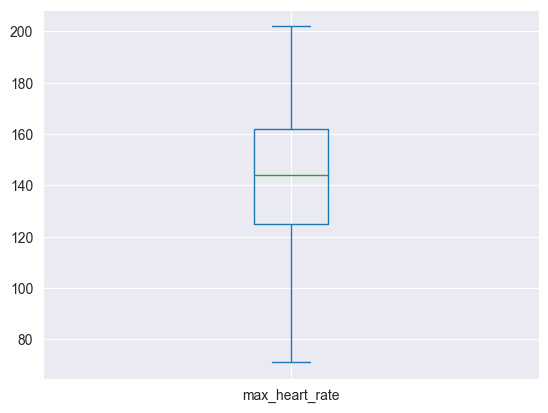

In [792]:
df.max_heart_rate.plot.box()
plt.show()

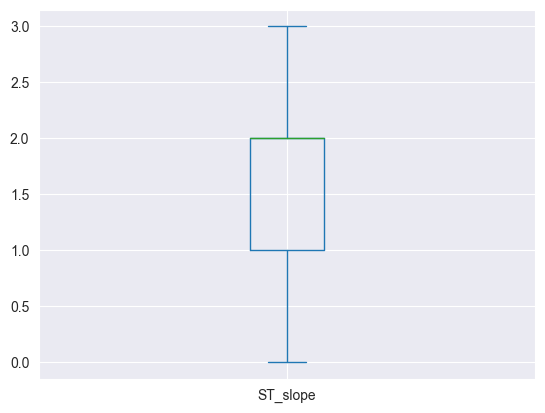

In [793]:
df.ST_slope.plot.box()
plt.show()


# Data visulaization with seborn

<AxesSubplot: xlabel='target', ylabel='count'>

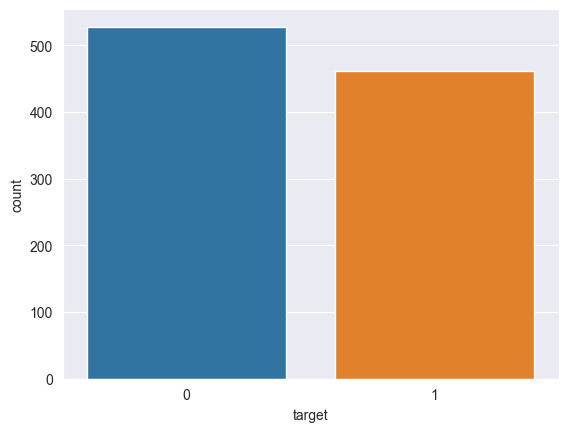

In [794]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=df)

In [795]:
df['target'].value_counts()

0    528
1    462
Name: target, dtype: int64

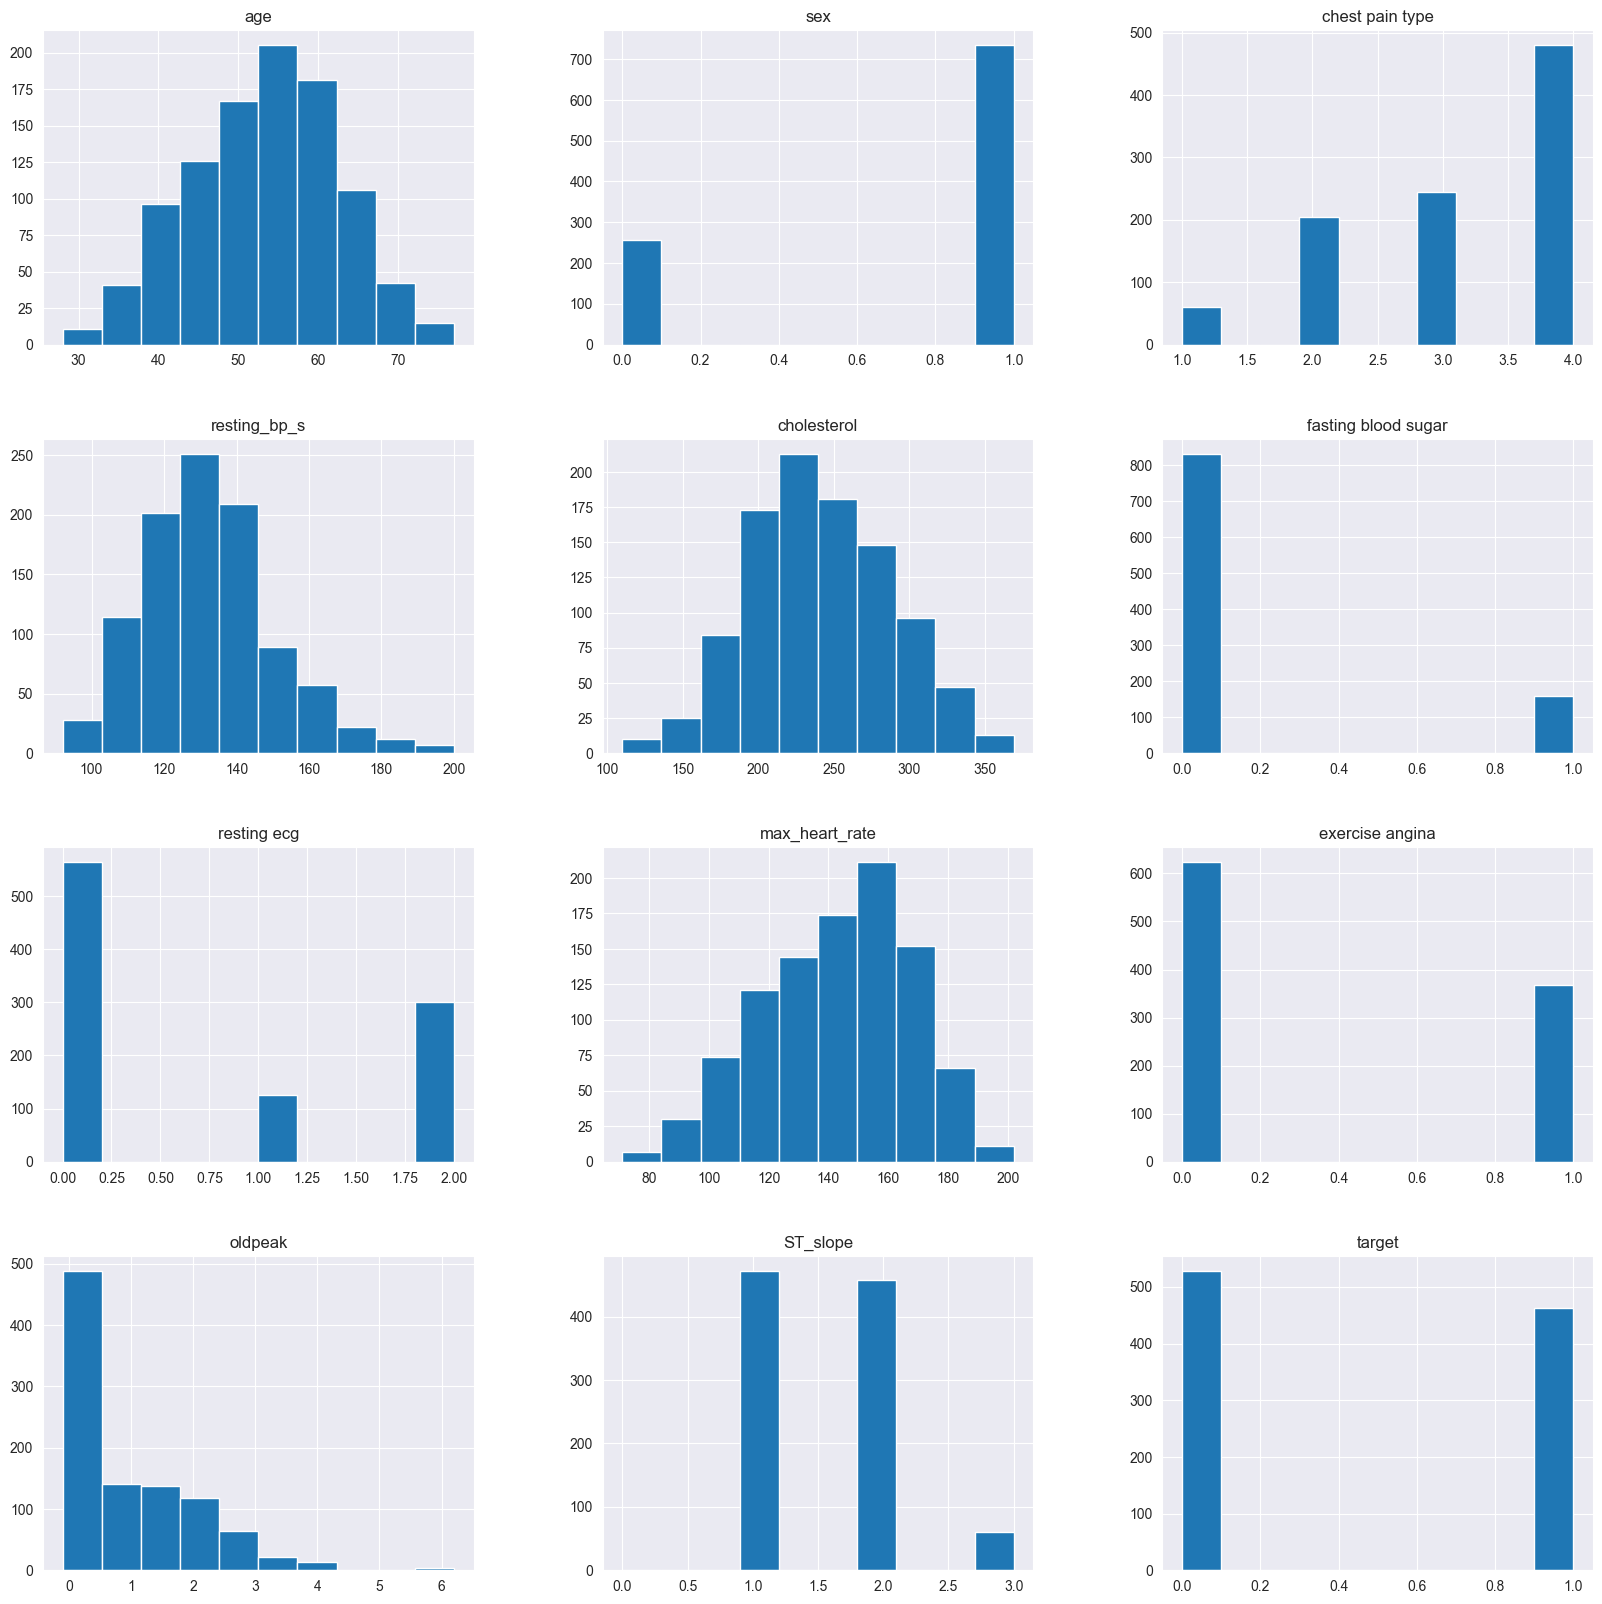

In [796]:
p = df.hist(figsize = (20,20))
##يعني السامبلس بين تلاتين وخمسه تلاتين تكررت اقل من 25 مرة وهكزا

# Exploratory Data Analysis
.


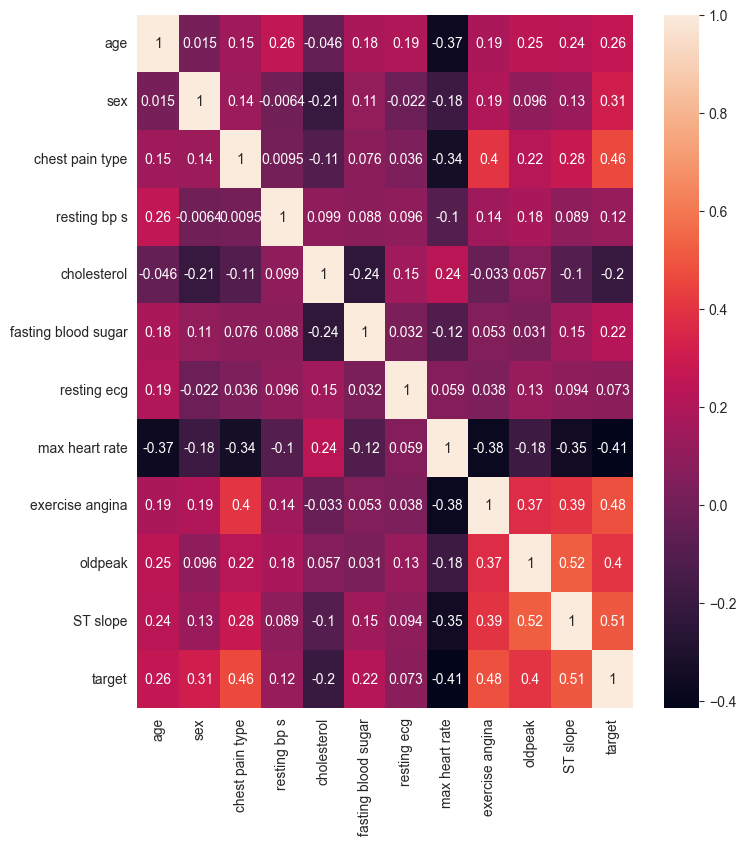

In [797]:
plt.figure(figsize=(8,9))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True)  # seaborn has very simple solution for heatmap

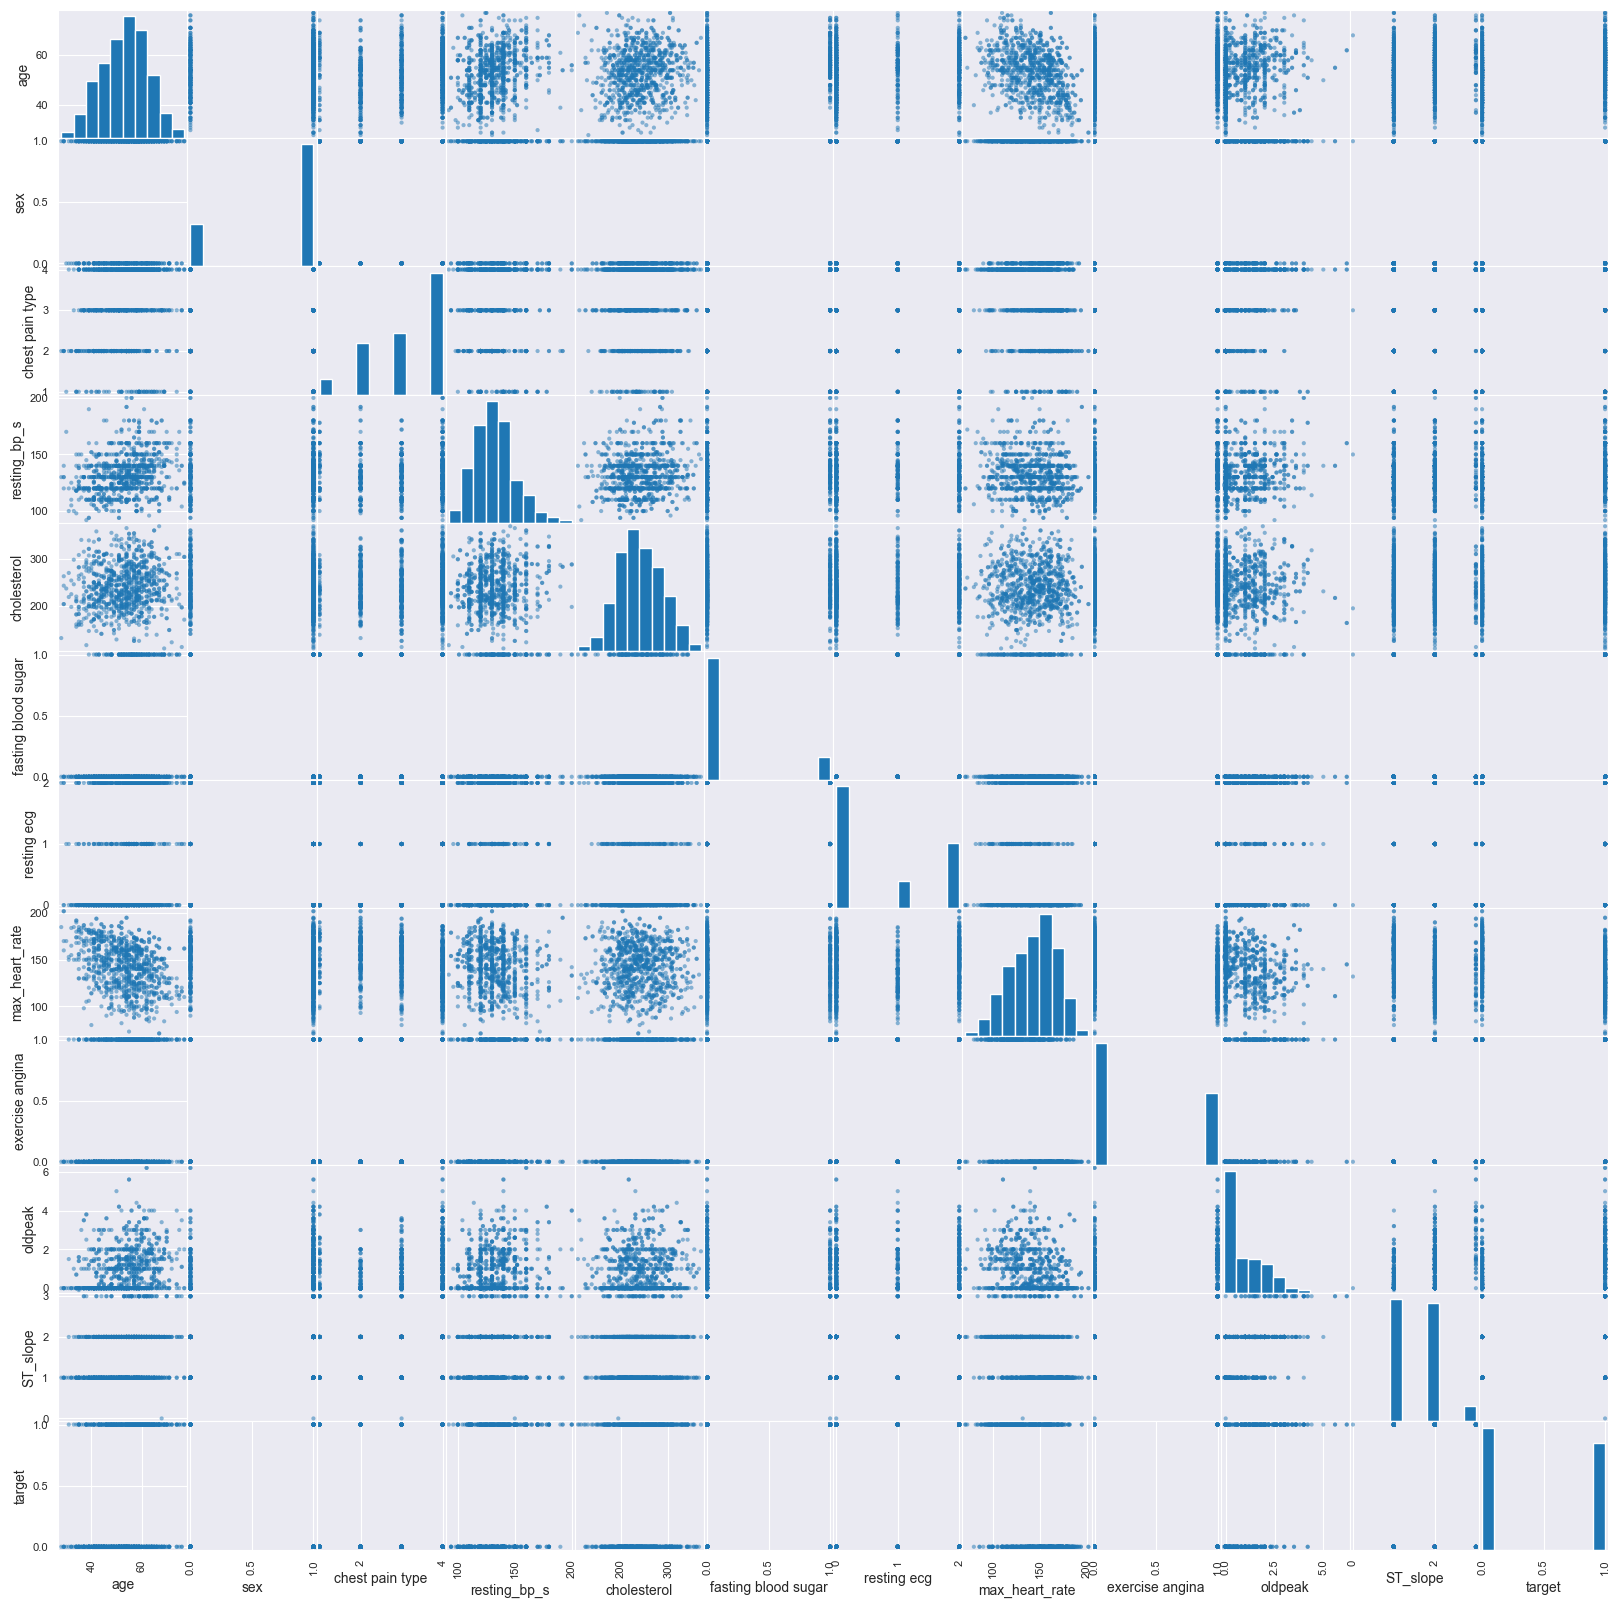

In [798]:
scatter_matrix(df, figsize = (20, 20))
plt.show()

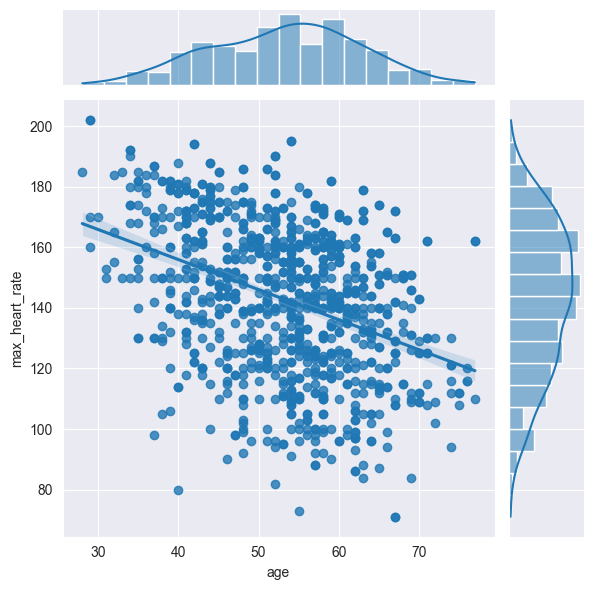

In [799]:
sns.jointplot(data=df, x="age", y="max_heart_rate", kind="reg")


In [800]:
# y includes our labels and x includes our features
Y= df.target                          # M or B 
list = ['target']
X = df.drop(list,axis = 1 )
X.head()

,age,sex,chest pain type,resting_bp_s,cholesterol,fasting blood sugar,resting ecg,max_heart_rate,exercise angina,oldpeak,ST_slope
0,40,1,2,140.0,289.0,0,0,172,0,0.0,1
1,49,0,3,160.0,180.0,0,0,156,0,1.0,2
2,37,1,2,130.0,283.0,0,1,98,0,0.0,1
3,48,0,4,138.0,214.0,0,0,108,1,1.5,2
4,54,1,3,150.0,195.0,0,0,122,0,0.0,1


# HyperParameter Tuning

In [801]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = df['target'] )


print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("\n\n\n")


X_train shape: (792, 11)
Y_train shape: (792,)
X_test shape: (198, 11)
Y_test shape: (198,)






In [802]:
Y.value_counts()


0    528
1    462
Name: target, dtype: int64

# **Logistic Regression:**

**Logistic Regression:**

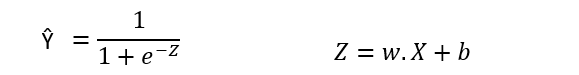

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

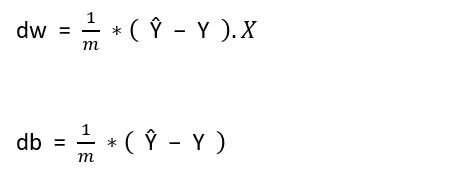

In [803]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape
##n: ا البايز عشان اصلا عدد االاوزان بيساوي عدد الفيتشر 
##
    #initiating weight & bias value

    self.w = np.zeros(self.n)
    
    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()       ##minimize loss function



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [819]:
model=Logistic_Regression(learning_rate=0.01,no_of_iterations=10000)


In [805]:
model.fit(X_train,Y_train)

Model Evaluation

*Accuracy* Score

In [806]:
from sklearn.metrics import accuracy_score

In [807]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)##the value predict in model
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [808]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6161616161616161


In [809]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [810]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.5959595959595959


# SVM with GRIDSearchCV

In [911]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [912]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(X_train, Y_train)


print("Support Vector Classifier Algorithm :")
test_SVM = svc.predict(X_test)
# accuracy score on the training data
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy)

Support Vector Classifier Algorithm :
Accuracy score of the training data :  0.8977272727272727
Accuracy score of the test data :  0.8636363636363636


 #Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)

In [914]:
accuracy = grid_search.best_score_


In [915]:
grid_search.best_params_


{'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}

In [916]:
svc = SVC(kernel = 'rbf', gamma=0.6,C=1)
svc.fit(X_train, Y_train)

SVC(C=1, gamma=0.6)

In [917]:
# Predicting the Test set results
y_pred = svc.predict(X_test)

In [918]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)

In [919]:
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
accuracy


Accuracy score of the training data :  0.9873737373737373


0.9090909090909091

In [921]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9090909090909091


In [930]:
input_data = ("58","1","4","132","458","1","0","69","0","1","3")
            # changing the input_data to numpy array
            input_data_as_numpy_array = np.asarray(input_data)

            # reshape the array as we are prediction for one instance
            input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
            
            std_data = scaler.transform(input_data_reshaped)

            prediction = svc.predict(std_data)


IndentationError: unexpected indent (3699777722.py, line 3)

# XGBClassifier

In [756]:
from xgboost import XGBClassifier
XGBClassifier()



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [757]:
model=XGBClassifier()
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
# accuracy score on the training data
from sklearn.metrics import accuracy_score,classification_report
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)
print (classification_report(Y_test, X_test_prediction))
pd.crosstab(Y_test, X_test_prediction)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9090909090909091
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.90      0.90      0.90        92

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



col_0,0,1
target,,
0,97,9
1,9,83


من السته وتسعين فيه عشره انحكالهم انو في مرض وطلع مفش مرض
وتسعه في مرض بس انحكالهم انو مفشش مرض 

To reduce this 

In [758]:
model=XGBClassifier(max_depth=7,subsample=1,colsample_bytree=0.4, n_estimators=100,
                    
              )
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
# accuracy score on the training data
from sklearn.metrics import accuracy_score,classification_report
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)
print (classification_report(Y_test, X_test_prediction))
pd.crosstab(Y_test, X_test_prediction)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9343434343434344
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.93      0.92      0.93        92

    accuracy                           0.93       198
   macro avg       0.93      0.93      0.93       198
weighted avg       0.93      0.93      0.93       198



col_0,0,1
target,,
0,100,6
1,7,85


# تجارب

In [952]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [953]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [954]:
classifier=xgboost.XGBClassifier()


In [955]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [956]:
random_search.fit(X_train,Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [957]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [958]:
random_search.best_params_


{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [959]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1)

In [960]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,Y_train,cv=10)

In [961]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# Decision_tree with Bagging

In [759]:
 from sklearn.ensemble import BaggingClassifier

from sklearn.datasets import make_classification
clf = BaggingClassifier(DecisionTreeClassifier(),
                        n_estimators=500, random_state=0,oob_score=True).fit(X, y)


clf.fit(X_train, Y_train)


print("Decision tree Algorithm :")
prediction_Decision_tree = clf.predict(X_test)
# accuracy score on the training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
accuracy_Decision_tree = accuracy_score(Y_test, prediction_Decision_tree)

print(classification_report(Y_test, prediction_Decision_tree))

print("the accuracy =" , accuracy_Decision_tree)



Decision tree Algorithm :
Accuracy score of the training data :  1.0
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.90      0.91      0.91        92

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198

the accuracy = 0.9141414141414141


# RandomForestClassifier

In [760]:
from sklearn.ensemble import RandomForestClassifier


ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42,max_leaf_nodes=110,bootstrap=True)
ranfor.fit(X_train, Y_train)


print("Random forest Algorithm :")
test_SVM = ranfor.predict(X_test)
# accuracy score on the training data
X_train_prediction = ranfor.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = ranfor.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy)


Random forest Algorithm :
Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9191919191919192


# Naive Bayes Algorithm

In [761]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)


print("Naive Bayes Algorithm :")
test_SVM = nb.predict(X_test)
# accuracy score on the training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)
# accuracy score on the test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy)

Naive Bayes Algorithm :
Accuracy score of the training data :  0.827020202020202
Accuracy score of the test data :  0.8484848484848485


# Feature Selection 

# Forward feture selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

model = sfs(XGBClassifier(max_depth=7,subsample=1,colsample_bytree=0.4, n_estimators=100,
                    
              ),
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)
model.fit(X_train,Y_train)


model.k_feature_names_

# ExhaustiveFeatureSelector

In [762]:
print('Best subset (corresponding names):', efs1.best_feature_names_)


Best subset (corresponding names): ('0', '1', '2', '3', '6', '7', '8', '9', '10')


In [763]:
efs1.best_score_

0.9116232784014011

In [764]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = df['target'] )


print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("\n\n\n")


X_train shape: (792, 11)
Y_train shape: (792,)
X_test shape: (198, 11)
Y_test shape: (198,)






In [765]:
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['age', 'sex', 'chest pain type', 'resting_bp_s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max_heart_rate',
       'exercise angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')


In [766]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = df['target'] )


print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("\n\n\n")


X_train shape: (792, 11)
Y_train shape: (792,)
X_test shape: (198, 11)
Y_test shape: (198,)




